In [ ]:


import numpy as np
import pandas as pd



In [ ]:
df=pd.read_csv('deceptive-opinion.csv')

In [ ]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


<Axes: xlabel='deceptive', ylabel='count'>

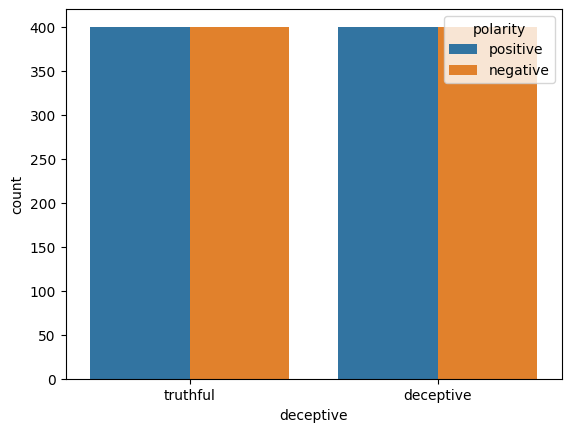

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'],hue='polarity',data=df)

<Axes: xlabel='deceptive', ylabel='count'>

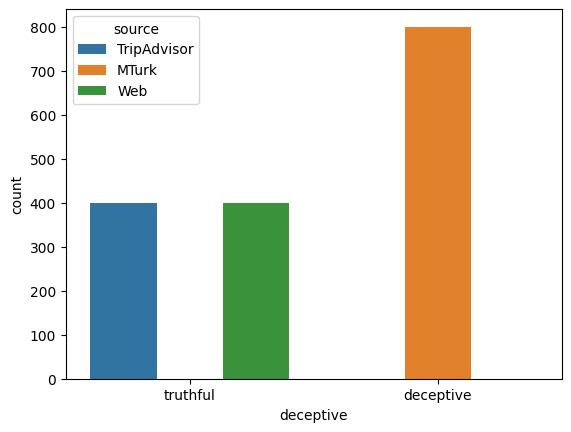

In [ ]:
sns.countplot(x=df['deceptive'],hue='source',data=df)

In [ ]:
#drop the feature hotel
df=df.drop(['hotel'],axis=1)

In [ ]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text

In [ ]:
df['text']=df['text'].apply(text_cleaning)

In [ ]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...


In [ ]:
df['complete_text']=df['source'] + '' +df['text']

In [ ]:
df

,deceptive,polarity,source,text,complete_text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...,TripAdvisorwe stayed for a one night getaway w...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...,TripAdvisortriple a rate with upgrade to view ...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...,TripAdvisorthis comes a little late as i m fin...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...,TripAdvisorthe omni chicago really delivers on...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...,TripAdvisori asked for a high floor away from ...
...,...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...,MTurkproblems started when i booked the interc...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...,MTurkthe amalfi hotel has a beautiful website ...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...,MTurkthe intercontinental chicago magnificent ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...,MTurkthe palmer house hilton while it looks g...


In [ ]:
x=df['complete_text']
y=df['deceptive']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))

In [ ]:
x_train=cv.fit_transform(x_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=100000)
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))


In [ ]:
from sklearn.metrics import accuracy_score
score_1=accuracy_score(y_test,pred_1)

In [ ]:
score_1*100

90.9375

In [ ]:
inp_df=pd.read_csv("/content/inp.csv")

In [ ]:
inpu=inp_df['inp_text']

In [ ]:
inpu

0    A memorable holiday experience. We all family ...
1    Hotel Allegro Chicago is a beautiful place. I ...
2    The services here are of the top quality. Room...
3    Had gone for a family dinner yesterday at ‘The...
4    I had an incredible experience at The Westin P...
Name: inp_text, dtype: object

In [ ]:
pred_inp=lr.predict(cv.transform(inpu))

In [ ]:
print(pred_inp)

[1 0 1 0 0]
